In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("D:\\pga16python")
from warnings import filterwarnings
filterwarnings('ignore')
import investpy

In [ ]:
#pd.set_option('display.max_rows',4000)

In [2]:
df_1 = investpy.get_currency_cross_historical_data(currency_cross='USD/INR',
                                                  order='ascending',from_date='01/01/2010', 
                                                  to_date='18/04/2021')

In [3]:
df_2 = investpy.get_currency_cross_historical_data(currency_cross='CHF/INR',
                                                  order='ascending',from_date='01/01/2010', 
                                                  to_date='18/04/2021')

In [4]:
df_2 = df_2['Close']

In [5]:
df = pd.read_csv('gold_rate_history.csv',usecols=['Date','Pure Gold (24 k)','Standard Gold (22 K)'],index_col=0,
                 parse_dates=True)

In [6]:
g_20 = pd.read_csv('goldrate_2020.csv',index_col=0,parse_dates=True)
g_20.columns = ['Pure Gold (24 k)','Standard Gold (22 K)']

In [7]:
df1 = df.loc['2010-01-01':'2019-12-31',]

In [8]:
g_21 = pd.read_csv('goldrate_2021.csv',index_col=0,parse_dates=True)

In [9]:
g_21.drop(['Unnamed: 3','Unnamed: 4'],inplace=True , axis = 1)
g_21.columns = ['Pure Gold (24 k)','Standard Gold (22 K)']

In [10]:
#Merging the datasets
series = pd.concat([df1,g_20,g_21],axis=0)

In [11]:
series1 = pd.merge(series,df_2,left_index = True, right_index = True)

In [13]:
series1 = pd.merge(series1,df_1['Close'],left_index = True, right_index = True)

In [15]:
series1.drop(['Close'], inplace=True,axis =1)

In [16]:
series1

,Pure Gold (24 k),Standard Gold (22 K),Close_x,Close_y
Date,,,,
2010-01-01,1673.5,1556.0,45.047,46.615
2010-01-04,1682.5,1565.0,44.953,46.295
2010-01-05,1699.5,1581.0,44.703,46.205
2010-01-06,1691.0,1573.0,44.468,45.695
2010-01-07,1687.5,1569.0,44.172,45.650
...,...,...,...,...
2021-04-12,4739.0,4380.0,81.253,74.980
2021-04-13,4739.0,4380.0,81.707,75.260
2021-04-14,4739.0,4380.0,81.337,75.050


# Exploratory Data Analysis

In [20]:
series1.isna().sum().sum()

0

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

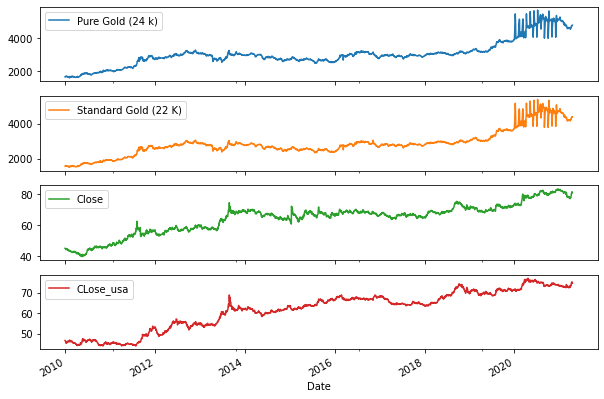

In [19]:
series1.plot(subplots = True,figsize = (10,7))

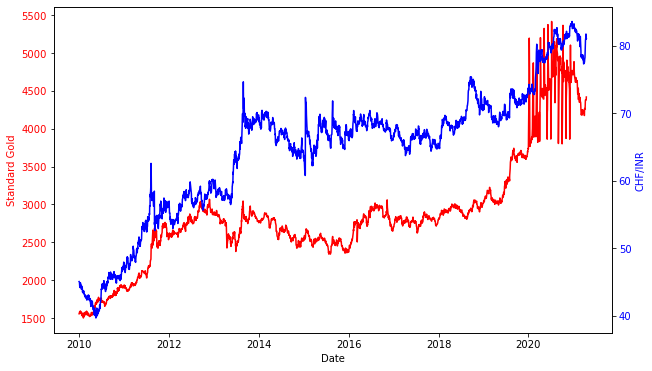

In [44]:
fig, ax1 = plt.subplots(figsize = (10,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Standard Gold', color='red')
ax1.plot(series1.index, series1['Standard Gold (22 K)'], color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()  
ax2.set_ylabel('CHF/INR', color='blue') 
ax2.plot(series1.index, series1['Close'], color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

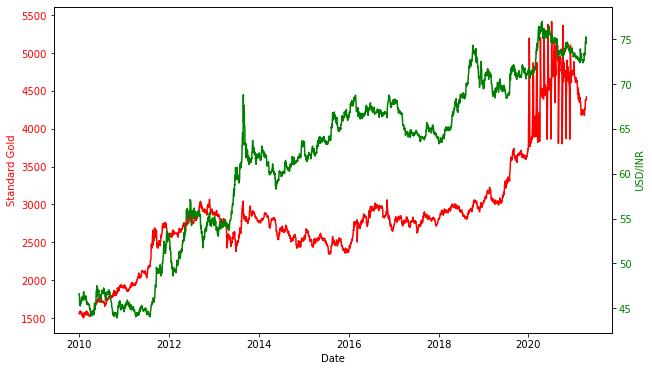

In [49]:
fig, ax1 = plt.subplots(figsize = (10,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Standard Gold', color='red')
ax1.plot(series1.index, series1['Standard Gold (22 K)'], color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()  
ax2.set_ylabel('USD/INR', color='green') 
ax2.plot(df_1.index, df_1['Close'], color='green')
ax2.tick_params(axis='y', labelcolor='green')

In [50]:
series1['Close_usd'] = df_1['Close']

In [14]:
series1.corr()

,Pure Gold (24 k),Standard Gold (22 K),Close_x,Close_y
Pure Gold (24 k),1.000000,0.998863,0.840761,0.767489
Standard Gold (22 K),0.998863,1.000000,0.846119,0.778966
Close_x,0.840761,0.846119,1.000000,0.949536
Close_y,0.767489,0.778966,0.949536,1.000000


In [15]:
from scipy.stats import spearmanr,pearsonr 
from scipy.stats import f_oneway

In [23]:
for i in ['Standard Gold (22 K)','Close_x','Close_y']:
    result = pearsonr(series1['Pure Gold (24 k)'],series1[i])
    print(f'The correlation between Pure Gold and {i} is:',result)

The correlation between Pure Gold and Standard Gold (22 K) is: (0.9988632414399268, 0.0)
The correlation between Pure Gold and Close_x is: (0.8407612903313518, 0.0)
The correlation between Pure Gold and Close_y is: (0.7674889885339831, 0.0)


In [24]:
# Spearman coefficient measures the monotonicity of two variables
for i in ['Standard Gold (22 K)','Close_x','Close_y']:
    result = spearmanr(series1['Pure Gold (24 k)'],series1[i])
    print(f'The spearman rank correlation between Pure Gold and {i} is:',result)

The spearman rank correlation between Pure Gold and Standard Gold (22 K) is: SpearmanrResult(correlation=0.9964945903524033, pvalue=0.0)
The spearman rank correlation between Pure Gold and Close_x is: SpearmanrResult(correlation=0.820696846754714, pvalue=0.0)
The spearman rank correlation between Pure Gold and Close_y is: SpearmanrResult(correlation=0.7840719691209875, pvalue=0.0)


In [74]:
f_oneway(series1['Pure Gold (24 k)'],series1['Standard Gold (22 K)'])

F_onewayResult(statistic=85.04525583068734, pvalue=3.970375437583307e-20)

<AxesSubplot:xlabel='Date'>

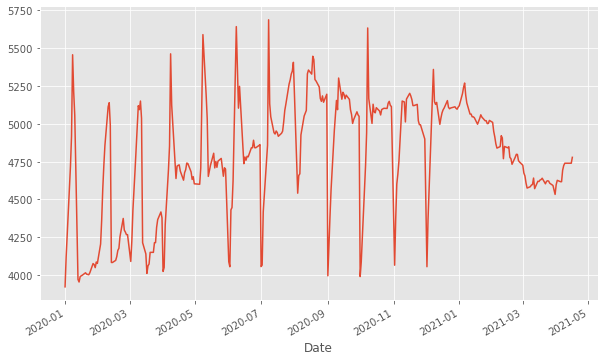

In [17]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
series1["Pure Gold (24 k)"].loc['2020-01-01':,].plot()

<AxesSubplot:>

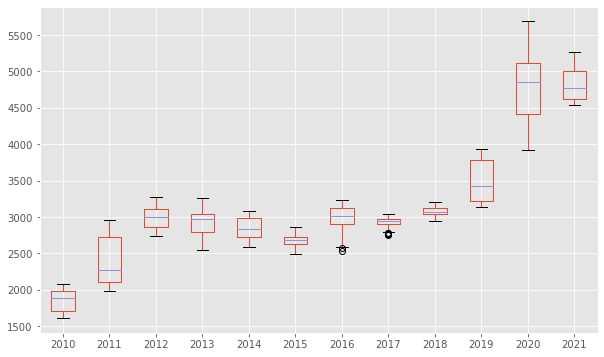

In [41]:
from pandas import Grouper
groups = series1['Pure Gold (24 k)'].groupby(Grouper(freq='A'))
year = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
year.columns = range(2010,2022)
plt.figure(figsize=(10,6))
year.boxplot()

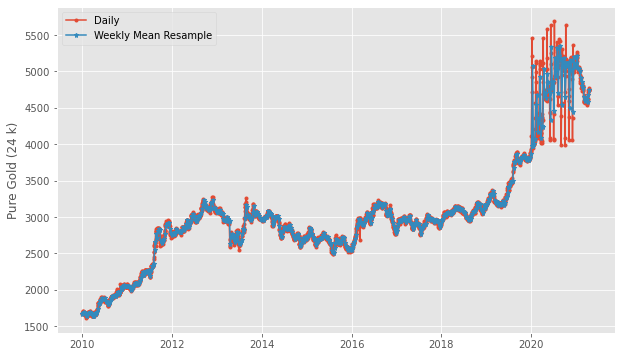

In [25]:
gold_week_mean = series1['Pure Gold (24 k)'].resample('W').mean()
fig, ax = plt.subplots()
ax.plot(series1.loc[:, 'Pure Gold (24 k)'],marker='.', linestyle='-', label='Daily')
ax.plot(gold_week_mean,marker='*',linestyle='-', label='Weekly Mean Resample',markersize = 5)
ax.set_ylabel('Pure Gold (24 k)')
ax.legend()

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import grangercausalitytests

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

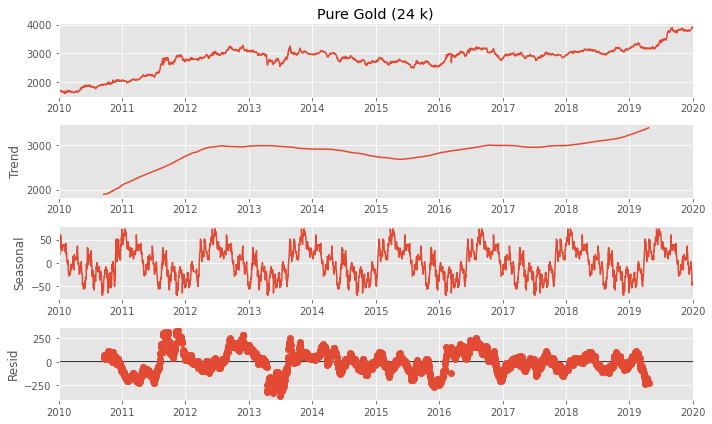

In [31]:
seasonal_decompose(series1.loc[:'2020-01-01','Pure Gold (24 k)'],freq= 365).plot()
plt.show()

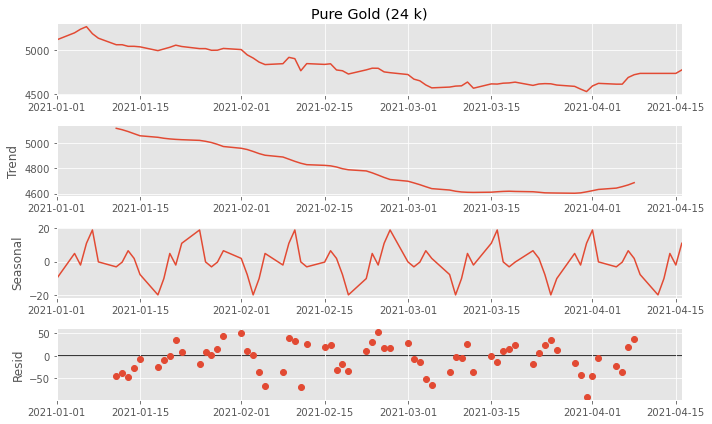

In [32]:
seasonal_decompose(series1.loc['2021-01-01':,'Pure Gold (24 k)'],freq= 12).plot()
plt.show()

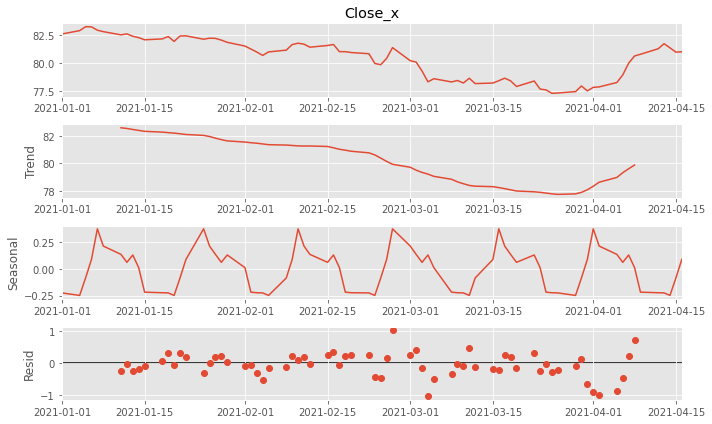

In [34]:
seasonal_decompose(series1.loc['2021-01-01':,'Close_x'],freq= 12).plot()
plt.show()

<AxesSubplot:xlabel='Pure Gold (24 k)', ylabel='Density'>

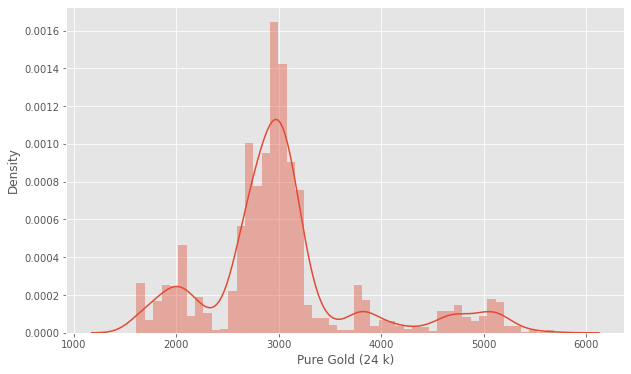

In [35]:
#plt.figure(figsize=(15,6))
sns.distplot(series['Pure Gold (24 k)'])

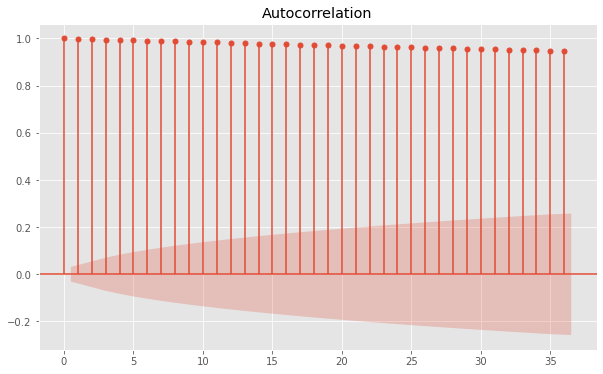

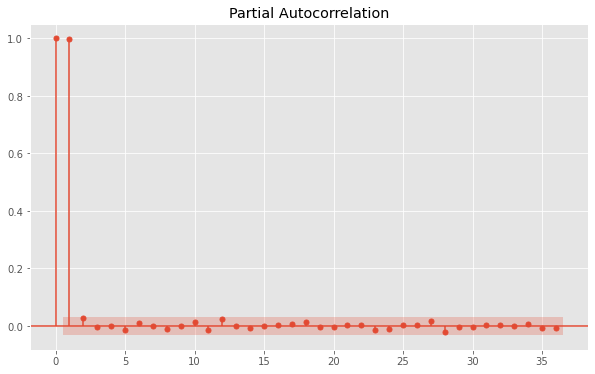

In [36]:
plot_acf(series['Pure Gold (24 k)'])
plot_pacf(series['Pure Gold (24 k)'])
plt.show()

# Granger’s Causality test 

In [22]:
granger1 = grangercausalitytests(series1[['Pure Gold (24 k)','Standard Gold (22 K)']],maxlag=2,verbose = True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=31.0895 , p=0.0000  , df_denom=2969, df_num=1
ssr based chi2 test:   chi2=31.1209 , p=0.0000  , df=1
likelihood ratio test: chi2=30.9591 , p=0.0000  , df=1
parameter F test:         F=31.0895 , p=0.0000  , df_denom=2969, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=22.2101 , p=0.0000  , df_denom=2966, df_num=2
ssr based chi2 test:   chi2=44.4951 , p=0.0000  , df=2
likelihood ratio test: chi2=44.1652 , p=0.0000  , df=2
parameter F test:         F=22.2101 , p=0.0000  , df_denom=2966, df_num=2


In [23]:
granger2 = grangercausalitytests(series1[['Standard Gold (22 K)','Pure Gold (24 k)']],maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=14.2360 , p=0.0002  , df_denom=2969, df_num=1
ssr based chi2 test:   chi2=14.2504 , p=0.0002  , df=1
likelihood ratio test: chi2=14.2163 , p=0.0002  , df=1
parameter F test:         F=14.2360 , p=0.0002  , df_denom=2969, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.6376  , p=0.0005  , df_denom=2966, df_num=2
ssr based chi2 test:   chi2=15.3010 , p=0.0005  , df=2
likelihood ratio test: chi2=15.2617 , p=0.0005  , df=2
parameter F test:         F=7.6376  , p=0.0005  , df_denom=2966, df_num=2


In [22]:
granger31 = grangercausalitytests(series1[['Pure Gold (24 k)','Close_x']],maxlag=2,verbose = True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=19.9071 , p=0.0000  , df_denom=2967, df_num=1
ssr based chi2 test:   chi2=19.9272 , p=0.0000  , df=1
likelihood ratio test: chi2=19.8606 , p=0.0000  , df=1
parameter F test:         F=19.9071 , p=0.0000  , df_denom=2967, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=13.4864 , p=0.0000  , df_denom=2964, df_num=2
ssr based chi2 test:   chi2=27.0182 , p=0.0000  , df=2
likelihood ratio test: chi2=26.8960 , p=0.0000  , df=2
parameter F test:         F=13.4864 , p=0.0000  , df_denom=2964, df_num=2


In [23]:
granger3 = grangercausalitytests(series1[['Standard Gold (22 K)','Close_x']],maxlag=2,verbose = True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=19.7560 , p=0.0000  , df_denom=2967, df_num=1
ssr based chi2 test:   chi2=19.7760 , p=0.0000  , df=1
likelihood ratio test: chi2=19.7104 , p=0.0000  , df=1
parameter F test:         F=19.7560 , p=0.0000  , df_denom=2967, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=14.3485 , p=0.0000  , df_denom=2964, df_num=2
ssr based chi2 test:   chi2=28.7453 , p=0.0000  , df=2
likelihood ratio test: chi2=28.6071 , p=0.0000  , df=2
parameter F test:         F=14.3485 , p=0.0000  , df_denom=2964, df_num=2


In [24]:
granger4 = grangercausalitytests(series1[['Standard Gold (22 K)','Close_y']],maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.0214 , p=0.0005  , df_denom=2967, df_num=1
ssr based chi2 test:   chi2=12.0336 , p=0.0005  , df=1
likelihood ratio test: chi2=12.0092 , p=0.0005  , df=1
parameter F test:         F=12.0214 , p=0.0005  , df_denom=2967, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.0255  , p=0.0024  , df_denom=2964, df_num=2
ssr based chi2 test:   chi2=12.0713 , p=0.0024  , df=2
likelihood ratio test: chi2=12.0468 , p=0.0024  , df=2
parameter F test:         F=6.0255  , p=0.0024  , df_denom=2964, df_num=2


In [25]:
granger5 = grangercausalitytests(series1[['Close_x','Pure Gold (24 k)']],maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5357  , p=0.0602  , df_denom=2967, df_num=1
ssr based chi2 test:   chi2=3.5393  , p=0.0599  , df=1
likelihood ratio test: chi2=3.5372  , p=0.0600  , df=1
parameter F test:         F=3.5357  , p=0.0602  , df_denom=2967, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9072  , p=0.1487  , df_denom=2964, df_num=2
ssr based chi2 test:   chi2=3.8208  , p=0.1480  , df=2
likelihood ratio test: chi2=3.8184  , p=0.1482  , df=2
parameter F test:         F=1.9072  , p=0.1487  , df_denom=2964, df_num=2


In [26]:
granger6 = grangercausalitytests(series1[['Close_y','Pure Gold (24 k)']],maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9060  , p=0.3413  , df_denom=2967, df_num=1
ssr based chi2 test:   chi2=0.9069  , p=0.3409  , df=1
likelihood ratio test: chi2=0.9068  , p=0.3410  , df=1
parameter F test:         F=0.9060  , p=0.3413  , df_denom=2967, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5018  , p=0.6055  , df_denom=2964, df_num=2
ssr based chi2 test:   chi2=1.0054  , p=0.6049  , df=2
likelihood ratio test: chi2=1.0052  , p=0.6050  , df=2
parameter F test:         F=0.5018  , p=0.6055  , df_denom=2964, df_num=2


# Cointegration test 

In [27]:
def adf(series,name=''):
    result = adfuller(series)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '*'*47)
    print('ADF Statistic: %.3f' %result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key , value in result[4].items():
        print('\t%s: %.3f' % (key,abs(value)))
    print(f'Result: The series is {"not " if result[1] >0.05 else ""}stationary')

In [28]:
def kpss_test(series,name='',**kw):
    statistic, p_value, n_lags, critical_values = kpss(series,**kw)
    print(f'    Kwiatkowski–Phillips–Schmidt–Shin Test on "{name}"', "\n   ", '*'*56)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value:{p_value}')
    print(f'num lags:{n_lags}')
    print('Critical values:')
    for key , value in critical_values.items():
        print(f' {key}: {value}')
    print(f'Result: The series is {"not " if p_value <0.05 else ""}stationary')

In [29]:
X1 = np.log(series1['Pure Gold (24 k)']).values
X2 = np.log(series1['Standard Gold (22 K)']).values
X3 = np.log(series1['Close_x']).values
X4 = np.log(series1['Close_y']).values

In [30]:
adf(X1,'Pure Gold')

    Augmented Dickey-Fuller Test on "Pure Gold" 
    ***********************************************
ADF Statistic: -1.495
p-value: 0.535791
Critical Values:
	1%: 3.433
	5%: 2.863
	10%: 2.567
Result: The series is not stationary


In [66]:
adf(X2,'Standard Gold')

    Augmented Dickey-Fuller Test on "Standard Gold" 
    ***********************************************
ADF Statistic: -1.584
p-value: 0.491641
Critical Values:
	1%: 3.433
	5%: 2.863
	10%: 2.567
Result: The series is not stationary


In [68]:
from warnings import filterwarnings
filterwarnings('ignore')

In [69]:
kpss_test(X1,'Pure Gold')

    Kwiatkowski–Phillips–Schmidt–Shin Test on "Pure Gold" 
    ********************************************************
KPSS Statistic: 6.454276321663351
p-value:0.01
num lags:29
Critical values:
 10%: 0.347
 5%: 0.463
 2.5%: 0.574
 1%: 0.739
Result: The series is not stationary


In [70]:
kpss_test(X2,'Standard Gold')

    Kwiatkowski–Phillips–Schmidt–Shin Test on "Standard Gold" 
    ********************************************************
KPSS Statistic: 6.660711652866777
p-value:0.01
num lags:29
Critical values:
 10%: 0.347
 5%: 0.463
 2.5%: 0.574
 1%: 0.739
Result: The series is not stationary


# Differencing to make the model stationary

In [31]:
X11 =(np.log(series1['Pure Gold (24 k)']) - np.log(series1['Pure Gold (24 k)']).shift(1)).dropna().values
X12 =(np.log(series1['Standard Gold (22 K)']) - np.log(series1['Standard Gold (22 K)']).shift(1)).dropna().values
X13 = (np.log(series1['Close_x']) - np.log(series1['Close_x']).shift(1)).dropna().values
X14 = (np.log(series1['Close_y']) - np.log(series1['Close_y']).shift(1)).dropna().values

In [72]:
kpss_test(X11,'Pure Gold')

    Kwiatkowski–Phillips–Schmidt–Shin Test on "Pure Gold" 
    ********************************************************
KPSS Statistic: 0.09739361880315325
p-value:0.1
num lags:29
Critical values:
 10%: 0.347
 5%: 0.463
 2.5%: 0.574
 1%: 0.739
Result: The series is stationary


In [73]:
kpss_test(X12,'Standard Gold')

    Kwiatkowski–Phillips–Schmidt–Shin Test on "Standard Gold" 
    ********************************************************
KPSS Statistic: 0.09556335587819412
p-value:0.1
num lags:29
Critical values:
 10%: 0.347
 5%: 0.463
 2.5%: 0.574
 1%: 0.739
Result: The series is stationary


In [32]:
kpss_test(X13,'CHF')

    Kwiatkowski–Phillips–Schmidt–Shin Test on "CHF" 
    ********************************************************
KPSS Statistic: 0.0769089390956847
p-value:0.1
num lags:29
Critical values:
 10%: 0.347
 5%: 0.463
 2.5%: 0.574
 1%: 0.739
Result: The series is stationary


C:\Users\Ayisha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1886: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [33]:
from warnings import filterwarnings
filterwarnings('ignore')

In [34]:
kpss_test(X14,'USD')

    Kwiatkowski–Phillips–Schmidt–Shin Test on "USD" 
    ********************************************************
KPSS Statistic: 0.0643246566310359
p-value:0.1
num lags:29
Critical values:
 10%: 0.347
 5%: 0.463
 2.5%: 0.574
 1%: 0.739
Result: The series is stationary


In [35]:
df_difference = series1.diff().dropna()

# Fitting the model

In [18]:
model = VAR(df_difference)
eff = model.select_order(maxlags=15).summary()
eff

,AIC,BIC,FPE,HQIC
0,11.54,11.55,1.027e+05,11.54
1,11.43,11.46,9.248e+04,11.44
2,11.33,11.37,8.315e+04,11.34
3,11.30,11.36,8.096e+04,11.32
4,11.24,11.32*,7.598e+04,11.27
5,11.23,11.33,7.528e+04,11.26
6,11.21,11.32,7.360e+04,11.25
7,11.20,11.33,7.282e+04,11.24
8,11.18,11.34,7.193e+04,11.24
9,11.17,11.34,7.109e+04,11.23


In [51]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
model_6 = VAR(series1)
model_fitted = model_6.fit(6)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 25, Apr, 2021
Time:                     22:58:39
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    9.63192
Nobs:                     2965.00    HQIC:                   9.50251
Log likelihood:          -30708.2    FPE:                    12453.3
AIC:                      9.42974    Det(Omega_mle):         12042.0
--------------------------------------------------------------------
Results for equation Pure Gold (24 k)
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           3.944138        11.501521            0.343           0.732
L1.Pure Gold (24 k)             0.391215         0.110920            3.527           0.000
L1.Standa

In [38]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

In [39]:
out

array([2.01449599, 2.01035964, 1.99747703, 1.99995088])

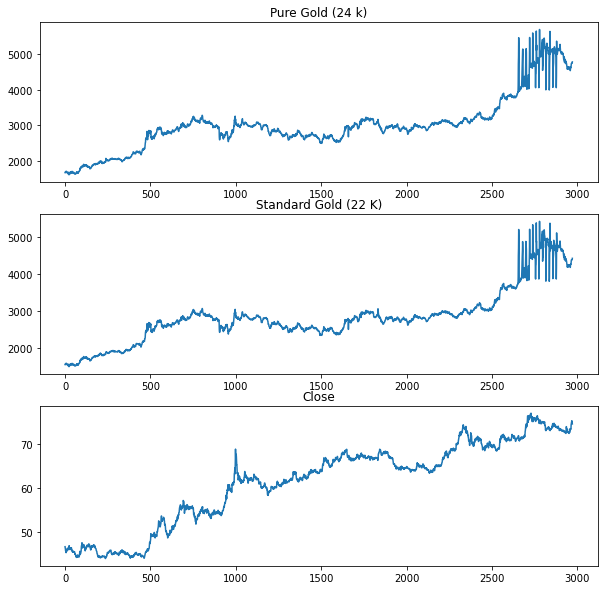

In [29]:
model_fitted.plot()
plt.show()

In [40]:
df_pred = model_fitted.fittedvalues

In [41]:
A = pd.DataFrame()
A['obs_pure']=series1.iloc[6:,0]
A['pred_pure']=df_pred.iloc[:,0]

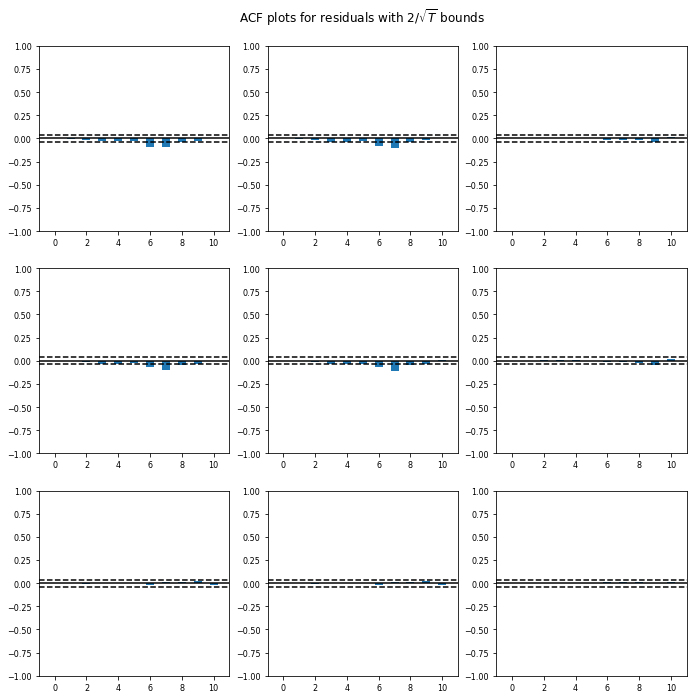

In [33]:
model_fitted.plot_acorr()
plt.show()

<AxesSubplot:xlabel='Date'>

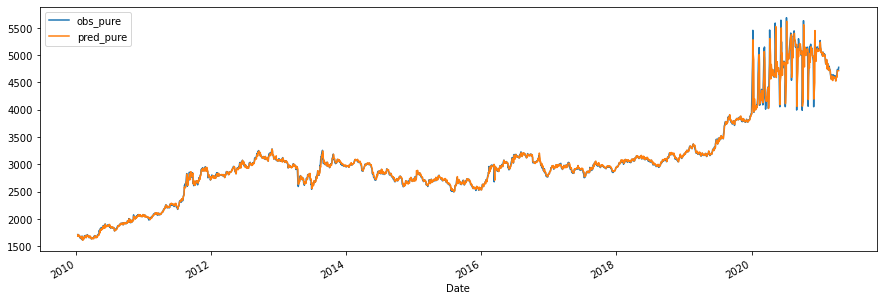

In [42]:
A.plot(figsize = (15,5))

# Evaluation

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [44]:
np.sqrt(mean_squared_error(A['obs_pure'],A['pred_pure']))

79.85337816474399

In [45]:
mean_absolute_error(A['obs_pure'],A['pred_pure'])

27.831144141670567

In [46]:
def bias(x):
    return x.mean()
def mape(y_actual,y_pred):
    mape = np.mean(np.abs((y_actual - y_pred)/y_actual))*100
    return mape

In [47]:
mape(A['obs_pure'],A['pred_pure'])

0.8127048817284054

In [48]:
bias(model_fitted.resid)

Pure Gold (24 k)       -3.169275e-12
Standard Gold (22 K)   -9.723771e-14
Close_x                 7.359449e-15
Close_y                 1.779832e-14
dtype: float64

In [55]:
#Forecast error variance decomposition
fevd = model_fitted.fevd(5)
fevd.summary()

FEVD for Pure Gold (24 k)
     Pure Gold (24 k)  Standard Gold (22 K)   Close_x   Close_y
0            1.000000              0.000000  0.000000  0.000000
1            0.993123              0.004259  0.002271  0.000347
2            0.983567              0.009861  0.006205  0.000367
3            0.976050              0.013764  0.009623  0.000563
4            0.969273              0.016192  0.013939  0.000596

FEVD for Standard Gold (22 K)
     Pure Gold (24 k)  Standard Gold (22 K)   Close_x   Close_y
0            0.972461              0.027539  0.000000  0.000000
1            0.964786              0.031991  0.002845  0.000378
2            0.952565              0.039320  0.007693  0.000421
3            0.941670              0.046012  0.011638  0.000680
4            0.932465              0.050553  0.016276  0.000706

FEVD for Close_x
     Pure Gold (24 k)  Standard Gold (22 K)   Close_x   Close_y
0            0.003590              0.000167  0.996244  0.000000
1            0.005716        

In [88]:
#fevd.plot()
#plt.show()

# White Noise

<AxesSubplot:xlabel='Date'>

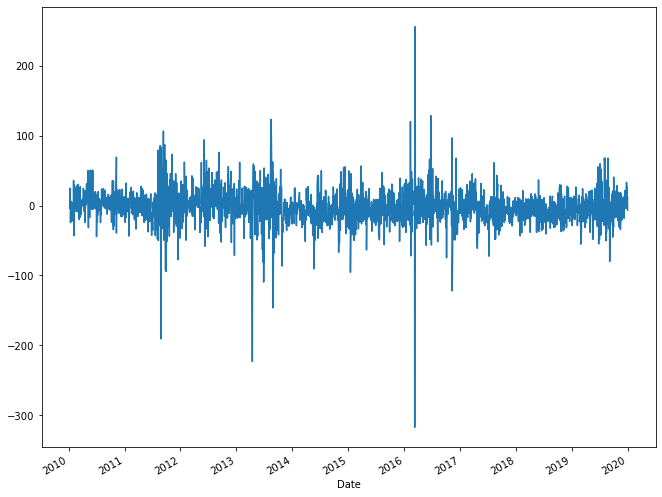

In [133]:
r = model_6_fitted.resid
r.loc[:'01-01-2020','Pure Gold (24 k)'].plot()

In [57]:
m = model_fitted.test_inst_causality('Close_x')
m.summary()

Test statistic,Critical value,p-value,df
610.6,7.815,0.000,3


In [60]:
m = model_fitted.test_causality('Standard Gold (22 K)',['Close_x'])
m.summary()

Test statistic,Critical value,p-value,df
4.460,2.099,0.000,"(6, 11760)"


In [62]:
m = model_fitted.test_causality('Pure Gold (24 k)',['Standard Gold (22 K)','Close_x'])
m.summary()

Test statistic,Critical value,p-value,df
5.015,1.753,0.000,"(12, 11760)"


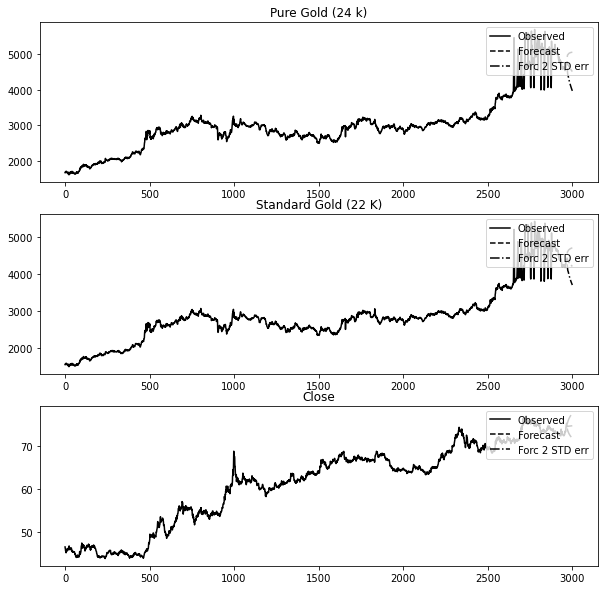

In [50]:
model_fitted.plot_forecast(steps = 31)
plt.show()

In [64]:
#Forecast for the next 10 days
yhat = model_fitted.forecast(model_fitted.y, steps=10)
yhat

array([[4759.02136079, 4402.29832194,   81.06593018,   74.59524672],
       [4738.70321067, 4383.57277004,   81.08607065,   74.62013267],
       [4716.6128317 , 4365.5337338 ,   81.06422768,   74.58583963],
       [4697.56341776, 4348.93862489,   81.0554757 ,   74.55804985],
       [4688.33438953, 4342.42541034,   81.05925102,   74.55955641],
       [4683.93001196, 4340.40279204,   81.06348549,   74.56660294],
       [4678.63041895, 4336.73310775,   81.06381575,   74.5664914 ],
       [4671.55305257, 4331.32814392,   81.06279614,   74.5631536 ],
       [4661.98769417, 4323.57331447,   81.06315084,   74.56320034],
       [4651.38850143, 4314.88206637,   81.06612538,   74.56627818]])

In [66]:
#Confidence interval of the forecasted values
conf = model_fitted.forecast_interval(model_fitted.y,steps = 10)
conf

(array([[4759.02136079, 4402.29832194,   81.06593018,   74.59524672],
        [4738.70321067, 4383.57277004,   81.08607065,   74.62013267],
        [4716.6128317 , 4365.5337338 ,   81.06422768,   74.58583963],
        [4697.56341776, 4348.93862489,   81.0554757 ,   74.55804985],
        [4688.33438953, 4342.42541034,   81.05925102,   74.55955641],
        [4683.93001196, 4340.40279204,   81.06348549,   74.56660294],
        [4678.63041895, 4336.73310775,   81.06381575,   74.5664914 ],
        [4671.55305257, 4331.32814392,   81.06279614,   74.5631536 ],
        [4661.98769417, 4323.57331447,   81.06315084,   74.56320034],
        [4651.38850143, 4314.88206637,   81.06612538,   74.56627818]]),
 array([[4601.84759158, 4255.61000409,   80.13404456,   74.0665358 ],
        [4524.37370282, 4183.52414696,   79.78013452,   73.86679681],
        [4463.66754387, 4131.57868281,   79.50787091,   73.68894196],
        [4421.32609145, 4093.93942418,   79.28672895,   73.54516513],
        [4399.2065